In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [123]:
# Read the raw file
with open('./data/NEW-DATA-1.T15.txt', 'r') as file:
    lines = file.readlines()

In [124]:
# Extract clean column names from the header
header = lines[0].strip()
column_names = []
for col in header.split():
    if ':' in col:
        column_names.append(col.split(':', 1)[1])  # Get part after colon


In [125]:
# Process data rows
data_rows = []
for line in lines[1:]:
    if line.strip():  # Skip empty lines
        values = line.strip().split()
        if len(values) == len(column_names):
            data_rows.append(values)

In [126]:
# Create DataFrame
df = pd.DataFrame(data_rows, columns=column_names)

# Display the DataFrame
print("Dataframe with clean column names:")
print(df.head())



Dataframe with clean column names:
         Date   Time Temperature_Comedor_Sensor Temperature_Habitacion_Sensor  \
0  13/03/2012  11:45                    18.1875                       17.8275   
1  13/03/2012  12:00                    18.4633                       18.1207   
2  13/03/2012  12:15                    18.7673                       18.4367   
3  13/03/2012  12:30                    19.0727                       18.7513   
4  13/03/2012  12:45                    19.3721                       19.0414   

  Weather_Temperature CO2_Comedor_Sensor CO2_Habitacion_Sensor  \
0                   0             216.56                221.92   
1                 6.8            219.947               220.363   
2                  17            219.403               218.933   
3                  18            218.613               217.045   
4                  20            217.714                216.08   

  Humedad_Comedor_Sensor Humedad_Habitacion_Sensor Lighting_Comedor_Sensor  \
0  

In [127]:
print(f"\nNumber of columns: {len(df.columns)}")


Number of columns: 24


In [128]:
print(f"Number of rows: {len(df)}")

Number of rows: 2764


# Exploratory Data Analysis (EDA)
In this section, we perform EDA to understand the dataset better. This includes:
- Checking for missing values
- Visualizing distributions of key features
- Identifying correlations between features
- Detecting outliers

In [129]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
dtype: int64


In [130]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour

In [131]:
# Add Month as a feature
df['Month'] = df['Date'].dt.month

In [132]:
# Check data types of the columns
print(df.dtypes)

Date                             datetime64[ns]
Time                             datetime64[ns]
Temperature_Comedor_Sensor               object
Temperature_Habitacion_Sensor            object
Weather_Temperature                      object
CO2_Comedor_Sensor                       object
CO2_Habitacion_Sensor                    object
Humedad_Comedor_Sensor                   object
Humedad_Habitacion_Sensor                object
Lighting_Comedor_Sensor                  object
Lighting_Habitacion_Sensor               object
Precipitacion                            object
Meteo_Exterior_Crepusculo                object
Meteo_Exterior_Viento                    object
Meteo_Exterior_Sol_Oest                  object
Meteo_Exterior_Sol_Est                   object
Meteo_Exterior_Sol_Sud                   object
Meteo_Exterior_Piranometro               object
Exterior_Entalpic_1                      object
Exterior_Entalpic_2                      object
Exterior_Entalpic_turbo                 

Missing values in each column:
Date                             0
Time                             0
Temperature_Comedor_Sensor       0
Temperature_Habitacion_Sensor    0
Weather_Temperature              0
CO2_Comedor_Sensor               0
CO2_Habitacion_Sensor            0
Humedad_Comedor_Sensor           0
Humedad_Habitacion_Sensor        0
Lighting_Comedor_Sensor          0
Lighting_Habitacion_Sensor       0
Precipitacion                    0
Meteo_Exterior_Crepusculo        0
Meteo_Exterior_Viento            0
Meteo_Exterior_Sol_Oest          0
Meteo_Exterior_Sol_Est           0
Meteo_Exterior_Sol_Sud           0
Meteo_Exterior_Piranometro       0
Exterior_Entalpic_1              0
Exterior_Entalpic_2              0
Exterior_Entalpic_turbo          0
Temperature_Exterior_Sensor      0
Humedad_Exterior_Sensor          0
Day_Of_Week                      0
Hour                             0
Month                            0
dtype: int64


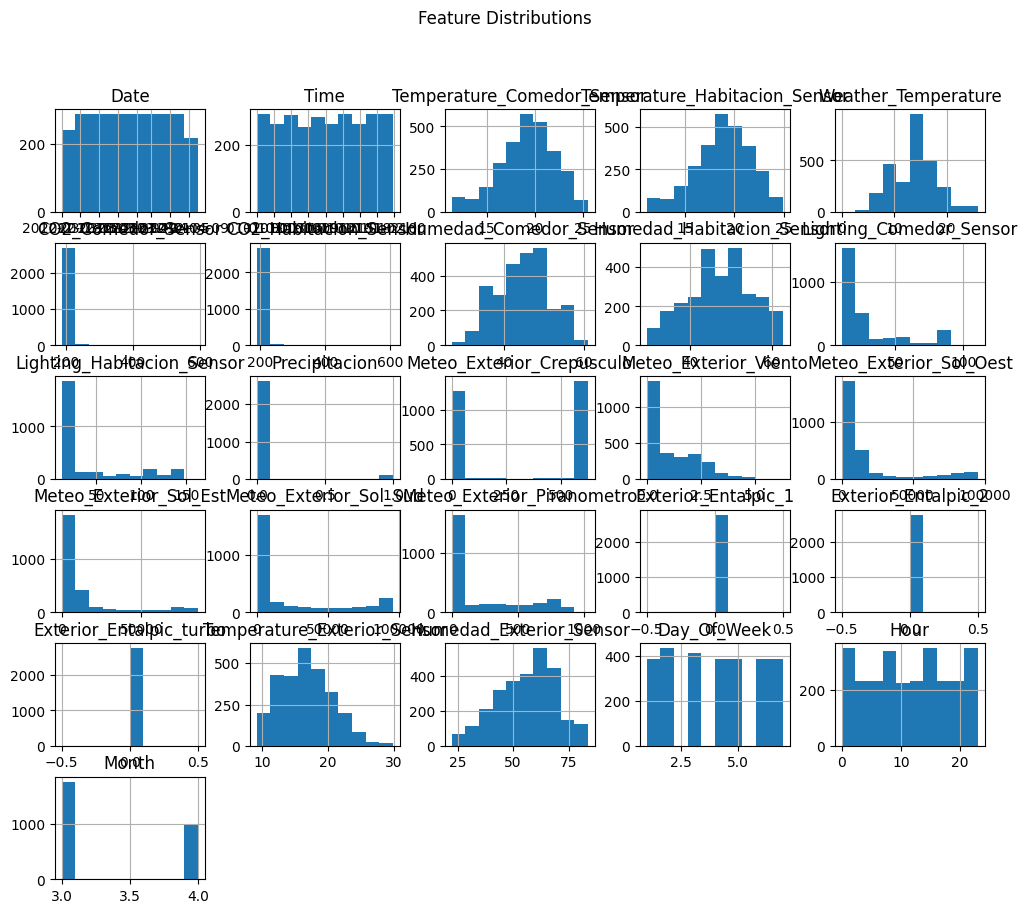

In [133]:
# Convert columns to numeric where applicable
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of type object
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Drop columns with all NaN values (if conversion failed for all rows in a column)
df = df.dropna(axis=1, how='all')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Visualize distributions of numerical features
if not df.select_dtypes(include=['number']).empty:
    df.hist(figsize=(12, 10))
    plt.suptitle('Feature Distributions')
    plt.show()
else:
    print("No numerical columns available for histogram plotting.")


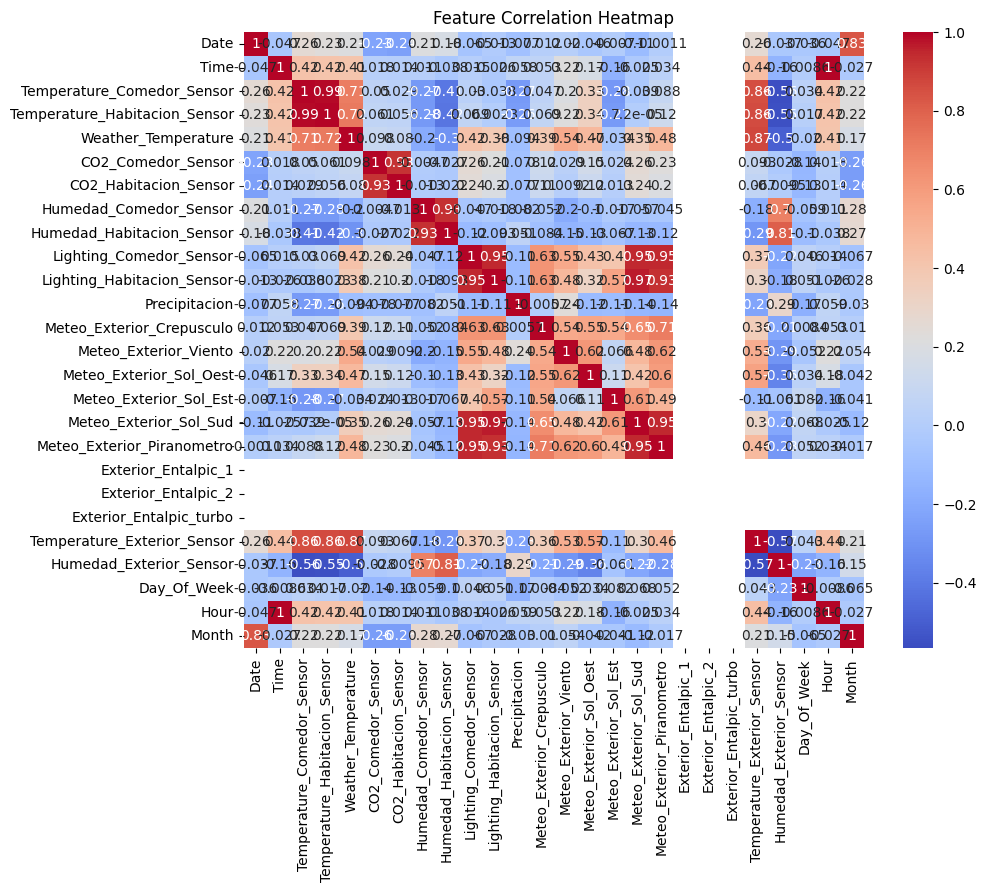

In [ ]:
# # Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()

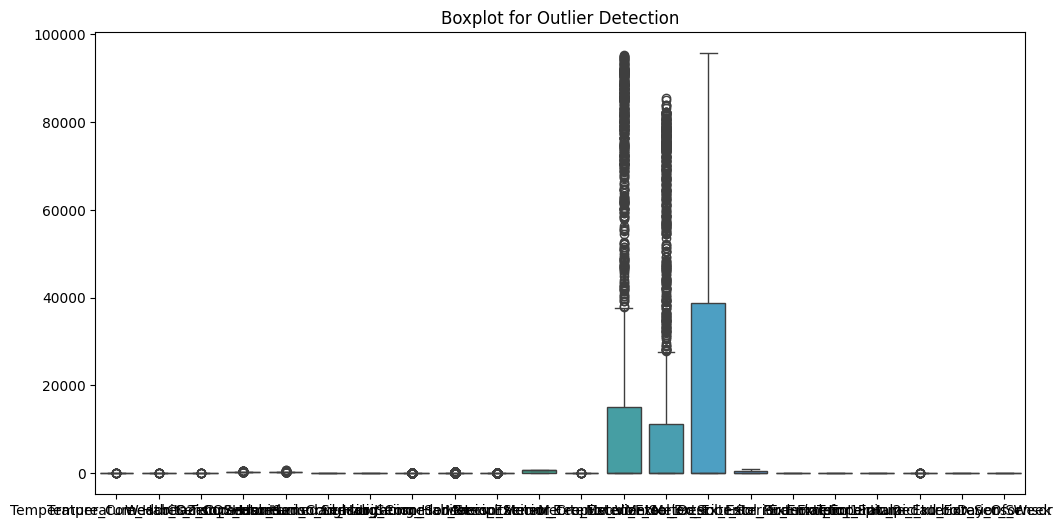

In [135]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Outlier Detection')
plt.show()

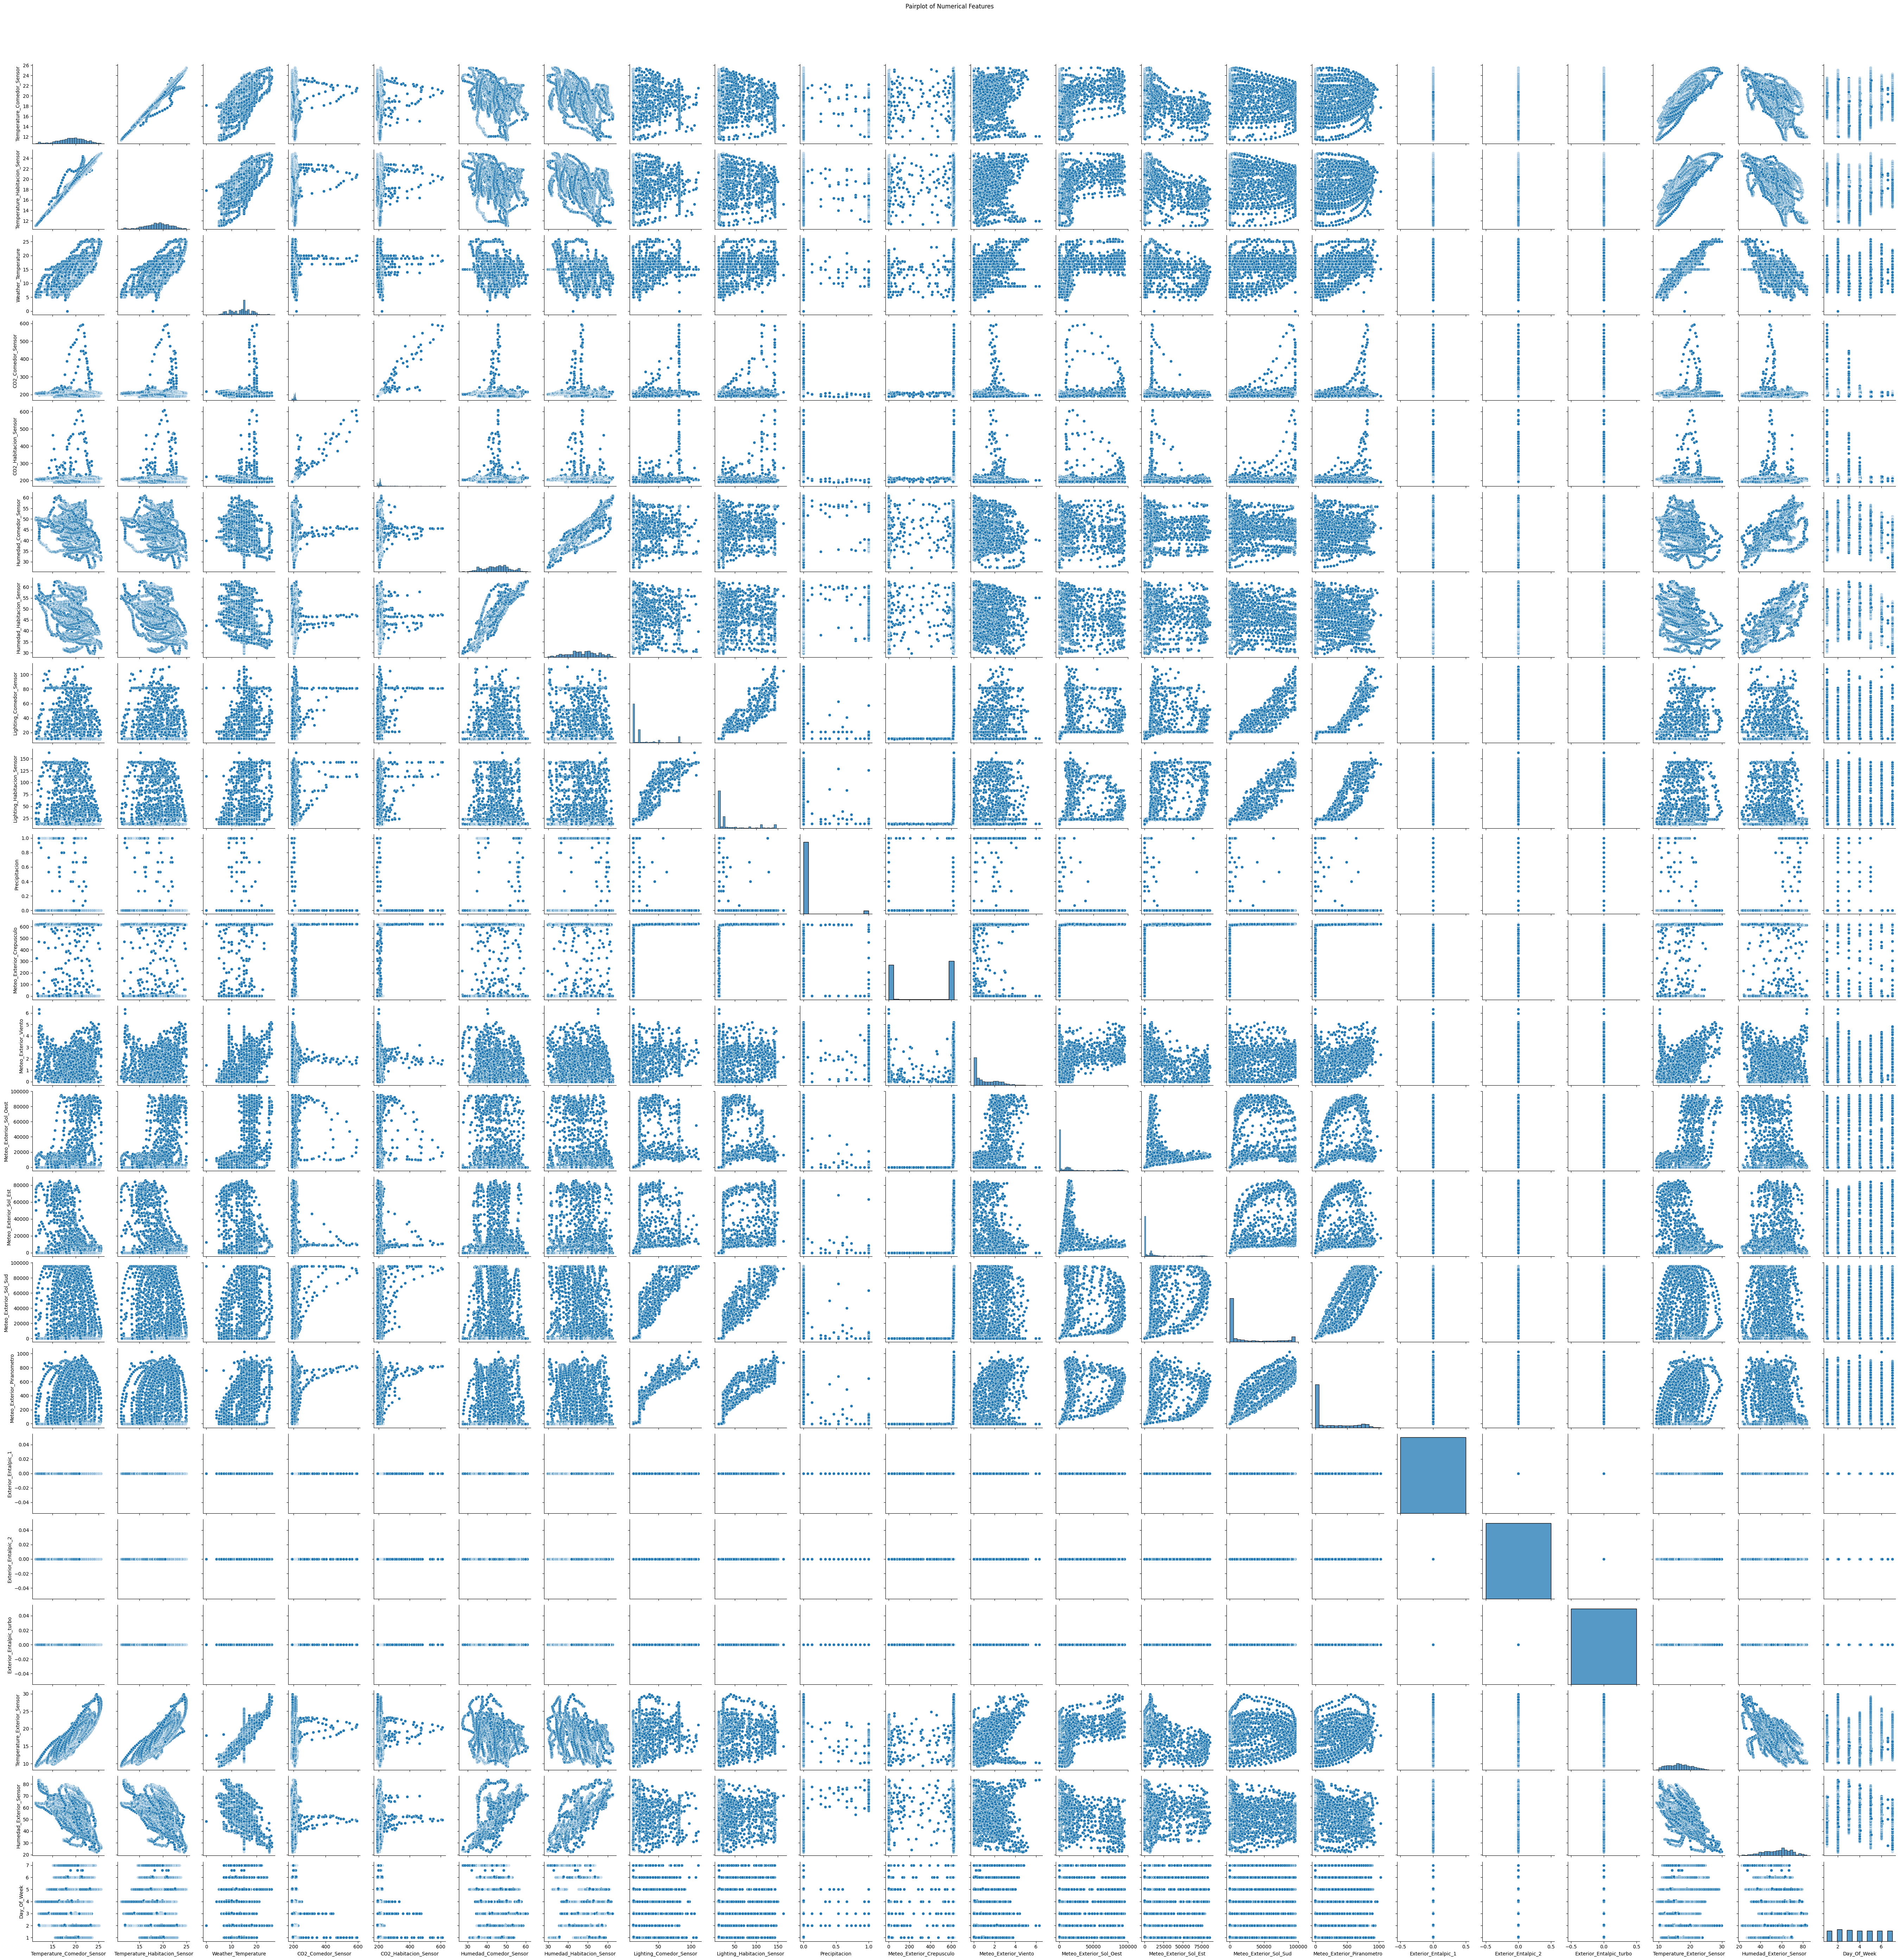

In [136]:
# Pairplot to visualize relationships between features
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Additional EDA Techniques
In this section, we perform advanced EDA techniques to gain deeper insights into the dataset.

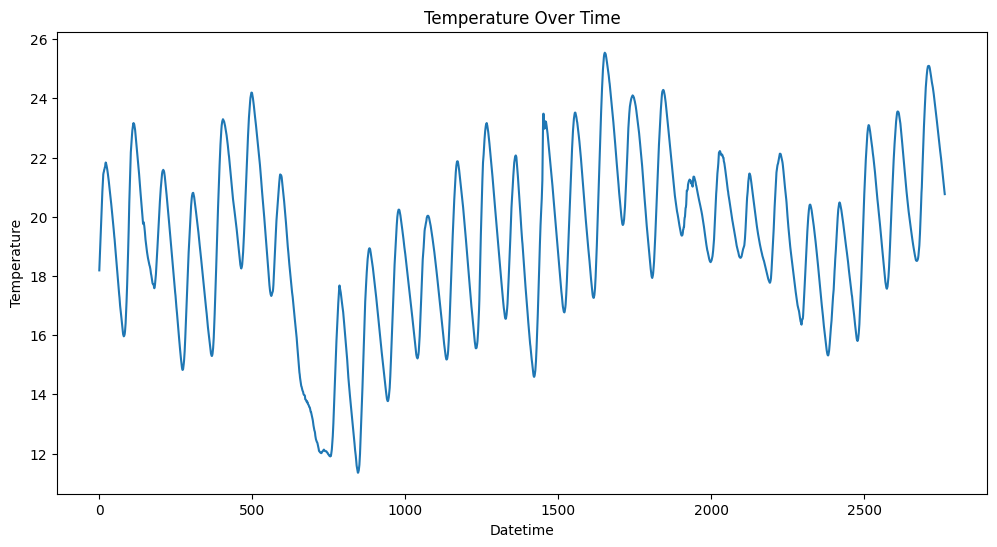

In [137]:
# Time Series Analysis
df['Temperature_Comedor_Sensor'] = pd.to_numeric(df['Temperature_Comedor_Sensor'], errors='coerce')
df['Temperature_Comedor_Sensor'].plot(figsize=(12, 6))
plt.title('Temperature Over Time')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.show()

Day_Of_Week
2.00000    429
3.00000    406
4.00000    380
1.00000    380
6.00000    380
5.00000    380
7.00000    380
2.06667      5
4.06667      4
3.06667      4
6.06667      4
5.06667      4
6.60000      4
1.06667      4
Name: count, dtype: int64


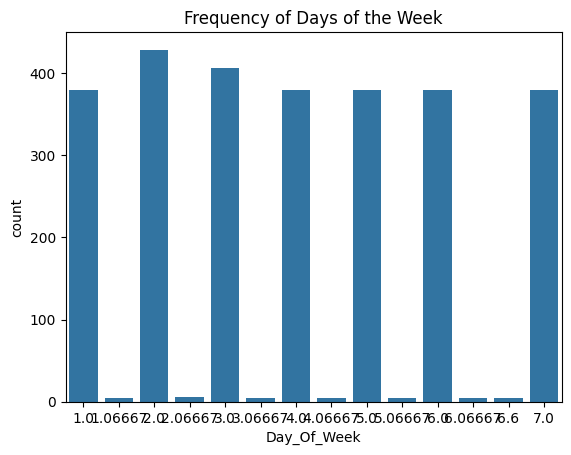

In [138]:
# Categorical Data Analysis
print(df['Day_Of_Week'].value_counts())
sns.countplot(x='Day_Of_Week', data=df)
plt.title('Frequency of Days of the Week')
plt.show()

Day_Of_Week
1.00000    20.035636
1.06667    19.614825
2.00000    19.089801
2.06667    18.475600
3.00000    18.377144
3.06667    18.250525
4.00000    18.715573
4.06667    18.583150
5.00000    18.746681
5.06667    19.247675
6.00000    19.352329
6.06667    19.615325
6.60000    20.506350
7.00000    20.154353
Name: Temperature_Comedor_Sensor, dtype: float64


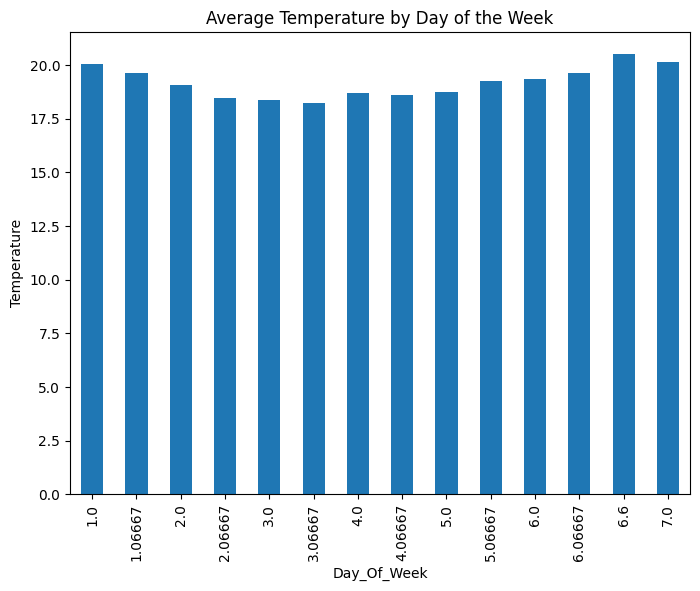

In [139]:
# Group-by Analysis
avg_temp_by_day = df.groupby('Day_Of_Week')['Temperature_Comedor_Sensor'].mean()
print(avg_temp_by_day)
avg_temp_by_day.plot(kind='bar', figsize=(8, 6))
plt.title('Average Temperature by Day of the Week')
plt.ylabel('Temperature')
plt.show()

In [140]:
# Anomaly Detection
df['Temperature_Zscore'] = zscore(df['Temperature_Comedor_Sensor'])
anomalies = df[(df['Temperature_Zscore'] > 3) | (df['Temperature_Zscore'] < -3)]
print('Anomalies:')
print(anomalies)

Anomalies:
Empty DataFrame
Columns: [Date, Time, Temperature_Comedor_Sensor, Temperature_Habitacion_Sensor, Weather_Temperature, CO2_Comedor_Sensor, CO2_Habitacion_Sensor, Humedad_Comedor_Sensor, Humedad_Habitacion_Sensor, Lighting_Comedor_Sensor, Lighting_Habitacion_Sensor, Precipitacion, Meteo_Exterior_Crepusculo, Meteo_Exterior_Viento, Meteo_Exterior_Sol_Oest, Meteo_Exterior_Sol_Est, Meteo_Exterior_Sol_Sud, Meteo_Exterior_Piranometro, Exterior_Entalpic_1, Exterior_Entalpic_2, Exterior_Entalpic_turbo, Temperature_Exterior_Sensor, Humedad_Exterior_Sensor, Day_Of_Week, Hour, Month, Temperature_Zscore]
Index: []

[0 rows x 27 columns]


Season
Spring    19.199722
Name: Temperature_Comedor_Sensor, dtype: float64


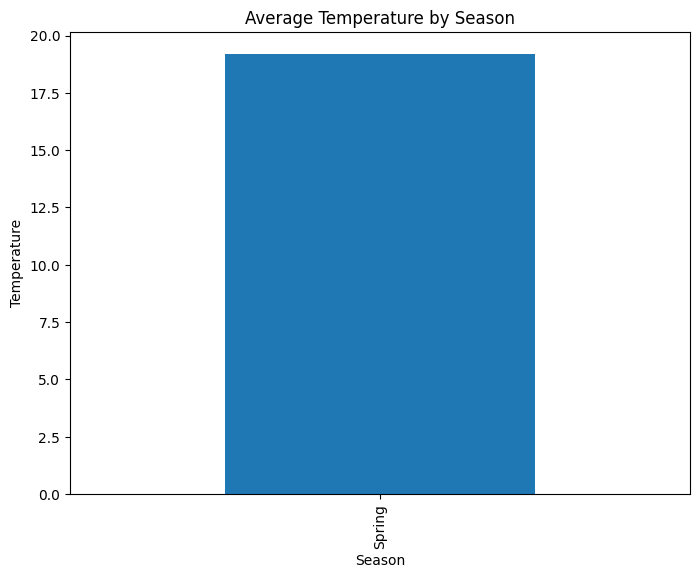

In [141]:
# Seasonal Analysis
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
avg_temp_by_season = df.groupby('Season')['Temperature_Comedor_Sensor'].mean()
print(avg_temp_by_season)
avg_temp_by_season.plot(kind='bar', figsize=(8, 6))
plt.title('Average Temperature by Season')
plt.ylabel('Temperature')
plt.show()